# Resolvendo o problema do Titanic no Kaggle (Mario Filho)
Para esse exemplo vamos seguir a playlist do **Mario Filho no Youtube** [Resolva o Titanic Como um Campeão do Kaggle](https://www.youtube.com/playlist?list=PLwnip85KhroW8Q1JSNbgl06iNPeC0SDkx).

# Lesson 01

## 01.1 - Importa as bibliotecas necessárias:

In [1]:
import pandas as pd
import numpy as np

## 01.2 - Pega os conjunto de dados de treino e teste:

In [2]:
train = pd.read_csv("datasets/train.csv")
test = pd.read_csv("datasets/test.csv")

## 01.3 - Exibe os dados de treino e dados de teste:

In [3]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**NOTE:**  
Veja que os dados de teste não tem a **feature "Survived"**, ou seja, a que vamos tentar prever.

## 01.4 - importa e instancia o módulo RandomForestClassifier:

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Instância.
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

## 01.5 - Cria uma função para categorizar (binarizar) os sexos:
 - **1** se for feminino (female)
 - **0** se for masculuno (male)

In [6]:
def sex_transform(value):
  if value == 'female':
    return 1
  else:
    return 0

## 01.6 - Cria uma nova feature (binary_sex) com a função sex_transform()

In [7]:
train['Binary_sex'] = train['Sex'].map(sex_transform)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Binary_sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


**NOTE:**  
Veja que agora nós temos a *feature* **"binary_sex"**.

## 01.7 - Contabiliza quantas das amostras são do sexo feminino (female/1) ou masculino (male/0):

In [8]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
train['Binary_sex'].value_counts()

0    577
1    314
Name: Binary_sex, dtype: int64

## 01.8 - Seleciona as features que nós vamos utilizar para treinar nosso modelo:

In [10]:
variables = ['Binary_sex', 'Age']
variables

['Binary_sex', 'Age']

## 01.9 - Por fim, abstrai as variáveis que serão enviadas para o modelo treinar:
 - **x** - Variáveis independentes;
 - **y** - Variável dependente (target).

In [11]:
x = train[variables]
y = train['Survived']

## 01.10 - Exibe as variáveis antes de iniciar o treinamento para nós verificarmos o que está acontecendo:

In [12]:
x.head()

,Binary_sex,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [13]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## 01.11 - Tratando os dados missing (ausentes):  
Outra observação é que nosso modelo não consegue treinar com dados **missing (ausentes / NaN)**. Sabendo disso nós vamos:
 - Verificar o número de dados missing em cada features;
 - Ver quanto porcento representa esses dados faltantes;
 - E por fim, aplicar alguma técnica para tratar esses dados que estão faltando.

In [14]:
# Data missing sum.
missing = x.isnull().sum()
missing

Binary_sex      0
Age           177
dtype: int64

In [15]:
# Data missing in percent.
percentMissing = (missing / len(x.index)) * 100
percentMissing

Binary_sex     0.00000
Age           19.86532
dtype: float64

---

In [16]:
# Data missing sum.
missing = y.isnull().sum()
missing

0

In [17]:
# Data missing in percent.
percentMissing = (missing / len(y.index)) * 100
percentMissing

0.0

**NOTE:**  
Preenche os dados missing com **-1** da *feature* **"Age"**.

In [18]:
x = x.fillna(-1)

In [19]:
# Data missing sum.
missing = x.isnull().sum()
missing

Binary_sex    0
Age           0
dtype: int64

In [20]:
# Data missing in percent.
percentMissing = (missing / len(x.index)) * 100
percentMissing

Binary_sex    0.0
Age           0.0
dtype: float64

# Lesson 02

## 02.1 - Treinando o modelo

In [21]:
model.fit(x, y)

RandomForestClassifier(n_jobs=-1, random_state=0)

## 02.2 - Classifica (binariza) a feature "Sex" dos dados de teste com o método sex_transform:

In [22]:
test['Binary_sex'] = test['Sex'].map(sex_transform)

## 02.3 - Prepara os dados de teste:
Aqui nós vamos aplicar o mesmo processamento dos dados treino para testar nosso modelo.

In [23]:
x_test = test[variables]
x_test = x_test.fillna(-1)
x_test.head()

,Binary_sex,Age
0,0,34.5
1,1,47.0
2,0,62.0
3,0,27.0
4,1,22.0


**NOTE:**  
 - Vejam que aqui nós utilizamos as mesmas features do dados de treino (Binary_sex e Age)
 - E Removemos os dados ausentes (missing).

## 02.4 - Tenta prever com os dados de treino:

In [24]:
# tentou prever quais sobreviveram e quais morreram.
predicted = model.predict(x_test)
predicted

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## 02.5 - Prepara os dados para submeter a avaliação do Kaggle:

In [29]:
# Relaciona o ID do passageiro dos dados de treino com o resultado da nossa previsão
sub = pd.Series(predicted, index=test['PassengerId'], name='Survived')
sub

PassengerId
892     0
893     1
894     0
895     1
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64

In [33]:
# Verifica o as dimensões (shape).
sub.shape

(418,)

In [34]:
# Salva o nosso resulta no formato ".csv".
sub.to_csv("first_model.csv", header=True)

In [35]:
!head -n20 first_model.csv

PassengerId,Survived
892,0
893,1
894,0
895,1
896,1
897,0
898,1
899,0
900,1
901,0
902,0
903,0
904,1
905,0
906,1
907,1
908,0
909,0
910,1


# Lesson 03

## 03.1 - Demonstra como o método "train_test_split" funciona:

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_false = np.arange(10)
x_false

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [38]:
train_test_split(x_false, test_size=0.5, random_state=0)

[array([6, 7, 3, 0, 5]), array([2, 8, 4, 9, 1])]

## 03.2 - Divide os dados do conjunto de treino em:
 - Dados de treino;
 - Dados de validação.

In [39]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.5)

## 03.3 - Verifica as dimensões (shape):

In [40]:
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((445, 2), (446, 2), (445,), (446,))

## 03.4 - Treina o modelo com o conjunto de dados separado para treino:

In [41]:
model.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

## 03.5 - Faz predições com os dados de validação (x_valid):

In [42]:
predicted2 = model.predict(x_valid)
predicted2

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,

## 03.6 - Verifica se os valores previstos foram iguais aos de validação (y_valid): 

In [43]:
y_valid == predicted2

159     True
879     True
328    False
49     False
530    False
       ...  
585     True
307     True
323     True
203     True
302     True
Name: Survived, Length: 446, dtype: bool

## 03.7 - Verifica accuracy:  "O número de acertos dividido pelo número total de exemplos (amostras)"

In [44]:
np.mean(y_valid == predicted2)

0.695067264573991

# Lesson 04

## 04.1 - Demonstra como a função KFold funciona em um exemplo abstrato (lista qualquer):

In [45]:
# Lista de teste:
x_false

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
from sklearn.model_selection import KFold

In [47]:
#?KFold # Ver a documentação do método KFold.

In [48]:
kf = KFold(3, shuffle=True, random_state=0)
for train_line, valid_line in kf.split(x_false):
  print("Train", train_line)
  print("Valid", valid_line)
  print()

Train [0 1 3 5 6 7]
Valid [2 4 8 9]

Train [0 2 3 4 5 8 9]
Valid [1 6 7]

Train [1 2 4 6 7 8 9]
Valid [0 3 5]



## 04.2 - Aplica o método KFold nos nossos dados de treino e validação e ver "accuracy" em cada bloco e por fim verifica a média de todas "accuracy":

In [49]:
kf = KFold(3, shuffle=True, random_state=0)
results = []

for train_line, valid_line in kf.split(x):
  print("Train", train_line.shape[0])
  print("Valid", valid_line.shape[0])
    
  x_train, x_valid = x.iloc[train_line], x.iloc[valid_line]
  y_train, y_valid = y.iloc[train_line], y.iloc[valid_line]

  model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
  model.fit(x_train, y_train)
    
  predited3 = model.predict(x_valid)
  accuracy = np.mean(y_valid == predited3)
  print("Current accuracy:", accuracy)
  print()

  results.append(accuracy)

Train 594
Valid 297
Current accuracy: 0.7609427609427609

Train 594
Valid 297
Current accuracy: 0.7845117845117845

Train 594
Valid 297
Current accuracy: 0.7643097643097643



In [50]:
results

[0.7609427609427609, 0.7845117845117845, 0.7643097643097643]

In [51]:
np.mean(results)

0.7699214365881032

# Lesson 5

## 05.1 - Aplica o método KFold com "RepeatedKFold":

In [52]:
from sklearn.model_selection import RepeatedKFold

In [53]:
#?RepeatedKFold # Ver a documentação do método.

In [54]:
results = []

# 2 divisões (n_splits) e repetir 10x (n_repeats)
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for train_line, valid_line in kf.split(x):
  print("Train", train_line.shape[0])
  print("Valid", valid_line.shape[0])
    
  x_train, x_valid = x.iloc[train_line], x.iloc[valid_line]
  y_train, y_valid = y.iloc[train_line], y.iloc[valid_line]

  model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
  model.fit(x_train, y_train)

  predited4 = model.predict(x_valid)
  accuracy = np.mean(y_valid == predited4)
  print("Current accuracy:", accuracy)
  print()

  results.append(accuracy)

Train 445
Valid 446
Current accuracy: 0.7511210762331838

Train 446
Valid 445
Current accuracy: 0.7617977528089888

Train 445
Valid 446
Current accuracy: 0.7533632286995515

Train 446
Valid 445
Current accuracy: 0.7595505617977528

Train 445
Valid 446
Current accuracy: 0.7690582959641256

Train 446
Valid 445
Current accuracy: 0.7573033707865169

Train 445
Valid 446
Current accuracy: 0.7399103139013453

Train 446
Valid 445
Current accuracy: 0.7595505617977528

Train 445
Valid 446
Current accuracy: 0.7354260089686099

Train 446
Valid 445
Current accuracy: 0.797752808988764

Train 445
Valid 446
Current accuracy: 0.7690582959641256

Train 446
Valid 445
Current accuracy: 0.7640449438202247

Train 445
Valid 446
Current accuracy: 0.7757847533632287

Train 446
Valid 445
Current accuracy: 0.7573033707865169

Train 445
Valid 446
Current accuracy: 0.7556053811659192

Train 446
Valid 445
Current accuracy: 0.7640449438202247

Train 445
Valid 446
Current accuracy: 0.7443946188340808

Train 446
Valid

## 05.2 - Demons visualmente os nossos resultados (KFolds):

In [55]:
# Exibe os gráficos na prória celular
%matplotlib inline

In [56]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


(array([2., 1., 3., 6., 4., 2., 1., 0., 0., 1.]),
 array([0.73542601, 0.74165869, 0.74789137, 0.75412405, 0.76035673,
        0.76658941, 0.77282209, 0.77905477, 0.78528745, 0.79152013,
        0.79775281]),
 <BarContainer object of 10 artists>)

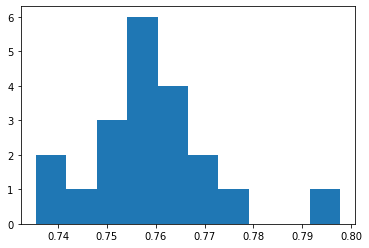

In [57]:
pylab.hist(results)

In [58]:
np.mean(results)

0.759601451100922

## 05.3 - Separa novas features para o nosso modelo aprender:

In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Binary_sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [60]:
new_variables = [
  'Binary_sex',
  'Age',
  'Pclass',
  'SibSp',
  'Parch',
  'Fare'
]

In [61]:
x = train[new_variables].fillna(-1)
y = train['Survived']

In [62]:
x.head()

,Binary_sex,Age,Pclass,SibSp,Parch,Fare
0,0,22.0,3,1,0,7.2500
1,1,38.0,1,1,0,71.2833
2,1,26.0,3,0,0,7.9250
3,1,35.0,1,1,0,53.1000
4,0,35.0,3,0,0,8.0500


In [63]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## 05.4 - Treina e verifica "accuracy" do modelo com as novas features:

In [64]:
results = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for train_line, valid_line in kf.split(x):
  print("Train", train_line.shape[0])
  print("Valid", valid_line.shape[0])
    
  x_train, x_valid = x.iloc[train_line], x.iloc[valid_line]
  y_train, y_valid = y.iloc[train_line], y.iloc[valid_line]

  model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
  model.fit(x_train, y_train)

  predited5 = model.predict(x_valid)
  accuracy = np.mean(y_valid == predited5)
  print("Current accuracy:", accuracy)
  print()

  results.append(accuracy)

Train 445
Valid 446
Current accuracy: 0.7869955156950673

Train 446
Valid 445
Current accuracy: 0.7797752808988764

Train 445
Valid 446
Current accuracy: 0.827354260089686

Train 446
Valid 445
Current accuracy: 0.8179775280898877

Train 445
Valid 446
Current accuracy: 0.7847533632286996

Train 446
Valid 445
Current accuracy: 0.7842696629213484

Train 445
Valid 446
Current accuracy: 0.8161434977578476

Train 446
Valid 445
Current accuracy: 0.7842696629213484

Train 445
Valid 446
Current accuracy: 0.8004484304932735

Train 446
Valid 445
Current accuracy: 0.8

Train 445
Valid 446
Current accuracy: 0.8183856502242153

Train 446
Valid 445
Current accuracy: 0.802247191011236

Train 445
Valid 446
Current accuracy: 0.8116591928251121

Train 446
Valid 445
Current accuracy: 0.8067415730337079

Train 445
Valid 446
Current accuracy: 0.820627802690583

Train 446
Valid 445
Current accuracy: 0.7887640449438202

Train 445
Valid 446
Current accuracy: 0.8385650224215246

Train 446
Valid 445
Current accu

(array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
 array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
        0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
        0.83856502]),
 <BarContainer object of 10 artists>)

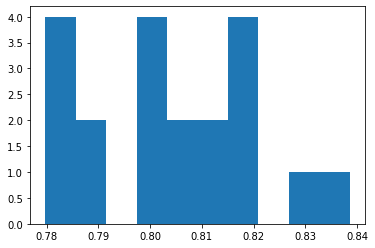

In [65]:
pylab.hist(results)

In [66]:
np.mean(results)

0.8041457147175896

## 05.5 - Prepara os dados para validar com o conjunto de dados de teste:

**Pega os conjuntos de dados de treino e teste:**

In [67]:
df_train = pd.read_csv("datasets/train.csv") # Training set.
df_test = pd.read_csv("datasets/test.csv") # Testing set.

**Categoriza (binariza) a feature "Sex" para os dois conjuntos de dados:**

In [68]:
# Categoriza (binariza) a feature "Sex" para os dados de treino e teste.
df_train['Binary_sex'] = df_train['Sex'].map(sex_transform)
df_test['Binary_sex'] = df_test['Sex'].map(sex_transform)

**Overview dos conjuntos de dados de treino e teste:**

In [69]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Binary_sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [70]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Binary_sex
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


**Separa as variáveis (features) independentes e dependente (target) que nosso modelo utilizará para aprender:**

In [71]:
x = df_train[new_variables].fillna(-1)
y = df_train['Survived']

In [72]:
x.head()

,Binary_sex,Age,Pclass,SibSp,Parch,Fare
0,0,22.0,3,1,0,7.2500
1,1,38.0,1,1,0,71.2833
2,1,26.0,3,0,0,7.9250
3,1,35.0,1,1,0,53.1000
4,0,35.0,3,0,0,8.0500


In [73]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

**Treina o modelo com o conjunto de dados de treino:**

In [74]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
model.fit(x, y)

RandomForestClassifier(n_jobs=-1, random_state=0)

**Faz predições com os dados de teste e as novas features:**  
Antes de fazer as previsões com os dados de teste vamos:
 - Configurar quais features serão utilizadas para fazer a previsão;
 - E preencher os valores ausentes (missing).

In [75]:
x_test = df_test[new_variables].copy()

In [76]:
x_test = x_test.fillna(-1)

In [77]:
x_test.head()

,Binary_sex,Age,Pclass,SibSp,Parch,Fare
0,0,34.5,3,0,0,7.8292
1,1,47.0,3,1,0,7.0000
2,0,62.0,2,0,0,9.6875
3,0,27.0,3,0,0,8.6625
4,1,22.0,3,1,1,12.2875


In [78]:
predicted6 = model.predict(x_test)
predicted6

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Prepara os dados novamente para fazer outra submisssão no Kaggle:

In [80]:
# Relaciona o ID do passageiro dos dados de treino com o resultado da nossa previsão
sub2 = pd.Series(predicted6, index=test['PassengerId'], name='Survived')
sub2

PassengerId
892     0
893     0
894     1
895     1
896     0
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64

In [81]:
# Verifica o as dimensões (shape).
sub2.shape

(418,)

In [82]:
# Salva o nosso resulta no formato ".csv".
sub.to_csv("second_model.csv", header=True)

In [83]:
!head -n20 second_model.csv

PassengerId,Survived
892,0
893,1
894,0
895,1
896,1
897,0
898,1
899,0
900,1
901,0
902,0
903,0
904,1
905,0
906,1
907,1
908,0
909,0
910,1


# Resumo

- **1° - Pega os dados de treino e teste:**
  - Os dados de treino contém a variável target.
  - Os dados de teste NÃO contém a variável target.
- **2° - Selecione as "features" que vamos utilizar para treinar o modelo (dos dados de treino):**
  - Variáveis independentes (x).
  - Variável dependente (y).
- **3° - Divide os dados em:**
  - Dados de treino;
  - Dados de validação.
- **4° - Treina o modelo (com os dados de treino).**
- **5° - Faz predições com os dados:**
  - Validação;
  - Ou teste.
- **6° - Valida o modelo (+Cross-Validation)**
- **7° - Seleciona os melhores hiperparâmetros (+Cross-Validation)**
- **8° - Prepara os dados para enviar para o Kaggle:**
  - **Cria uma Series que vai ter:**
    - O ID da amostra de teste que nós tentamos prever;
    - Previsão, ou seja, qual valor nosso modelo preveu correspondente ao ID.


**Rodrigo Leite -** *drigols*